# Project 2

# Week 7 | Project - 2
Group 4: Joshua Hummell, Jiho Kim, Scott Reed



1. Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

## Data load

The first thing we want to do is load the packages and data. The data is from a Facebook-like Forum Network we: [https://toreopsahl.com/datasets/#online_forum_network](https://toreopsahl.com/datasets/#online_forum_network). The data represents an two-mode network among 899 users and 522 topics. The connections are weighted the number of messages or characters that a user posted about a topic.


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite as bi
import pandas as pd
import scipy
import random

Now let's take a look at what we will be working with

Users are the people, Topic is the form that they post in and weight is how actively they post in the forum.

In [ ]:
SN_Data = pd.read_csv("https://raw.githubusercontent.com/jhumms/620/main/project-2/social_network_data.csv")
SN_Data['user'] = 'u' + SN_Data['user'].astype(str)
SN_Data['topic'] = 'p' + SN_Data['topic'].astype(str)
SN_Data.head()

In [ ]:
## Creating the Network
G = nx.Graph()
G.add_nodes_from(SN_Data['user'], bipartite=0)
G.add_nodes_from(SN_Data['topic'], bipartite=1)
G.add_weighted_edges_from([d for d in SN_Data[['user','topic','weight']].values])

In order to proceed with the bipartite analysis we run a test using Networkx functions to check for connectivity and a bipartite graph

In [4]:
nx.is_connected(G)

False

In [5]:
bi.is_bipartite(G)

True

It is fine that they are not connected becuase we will eliminate them when we run our island method

# Showing the bipartite graph
We will need to get the nodes from users and pages and show what the data looks like

In [6]:
# Nodes
user_nodes = {n for n, d in G.nodes(data=True) if d['bipartite']==0}
page_nodes = set(G) - user_nodes

In [7]:
print("There are:",len(user_nodes), "User Nodes, and", len(page_nodes), "Page Nodes")

There are: 899 User Nodes, and 522 Page Nodes


Now we have to set up a dictionary and create a color scheme in order to print the bipartite graph

In [8]:
pos = dict()

pos.update( (n, (1, i)) for i, n in enumerate(user_nodes) )
pos.update( (n, (2, i)) for i, n in enumerate(page_nodes) )

In [9]:
color = []
color = bi.color(G)

color_dict = {0:'b', 1:'r'}

color_list = [color_dict[i[1]] for i in G.nodes.data('bipartite')]

In [10]:
edge_list = nx.to_edgelist(G)

Finally, we can show it. 

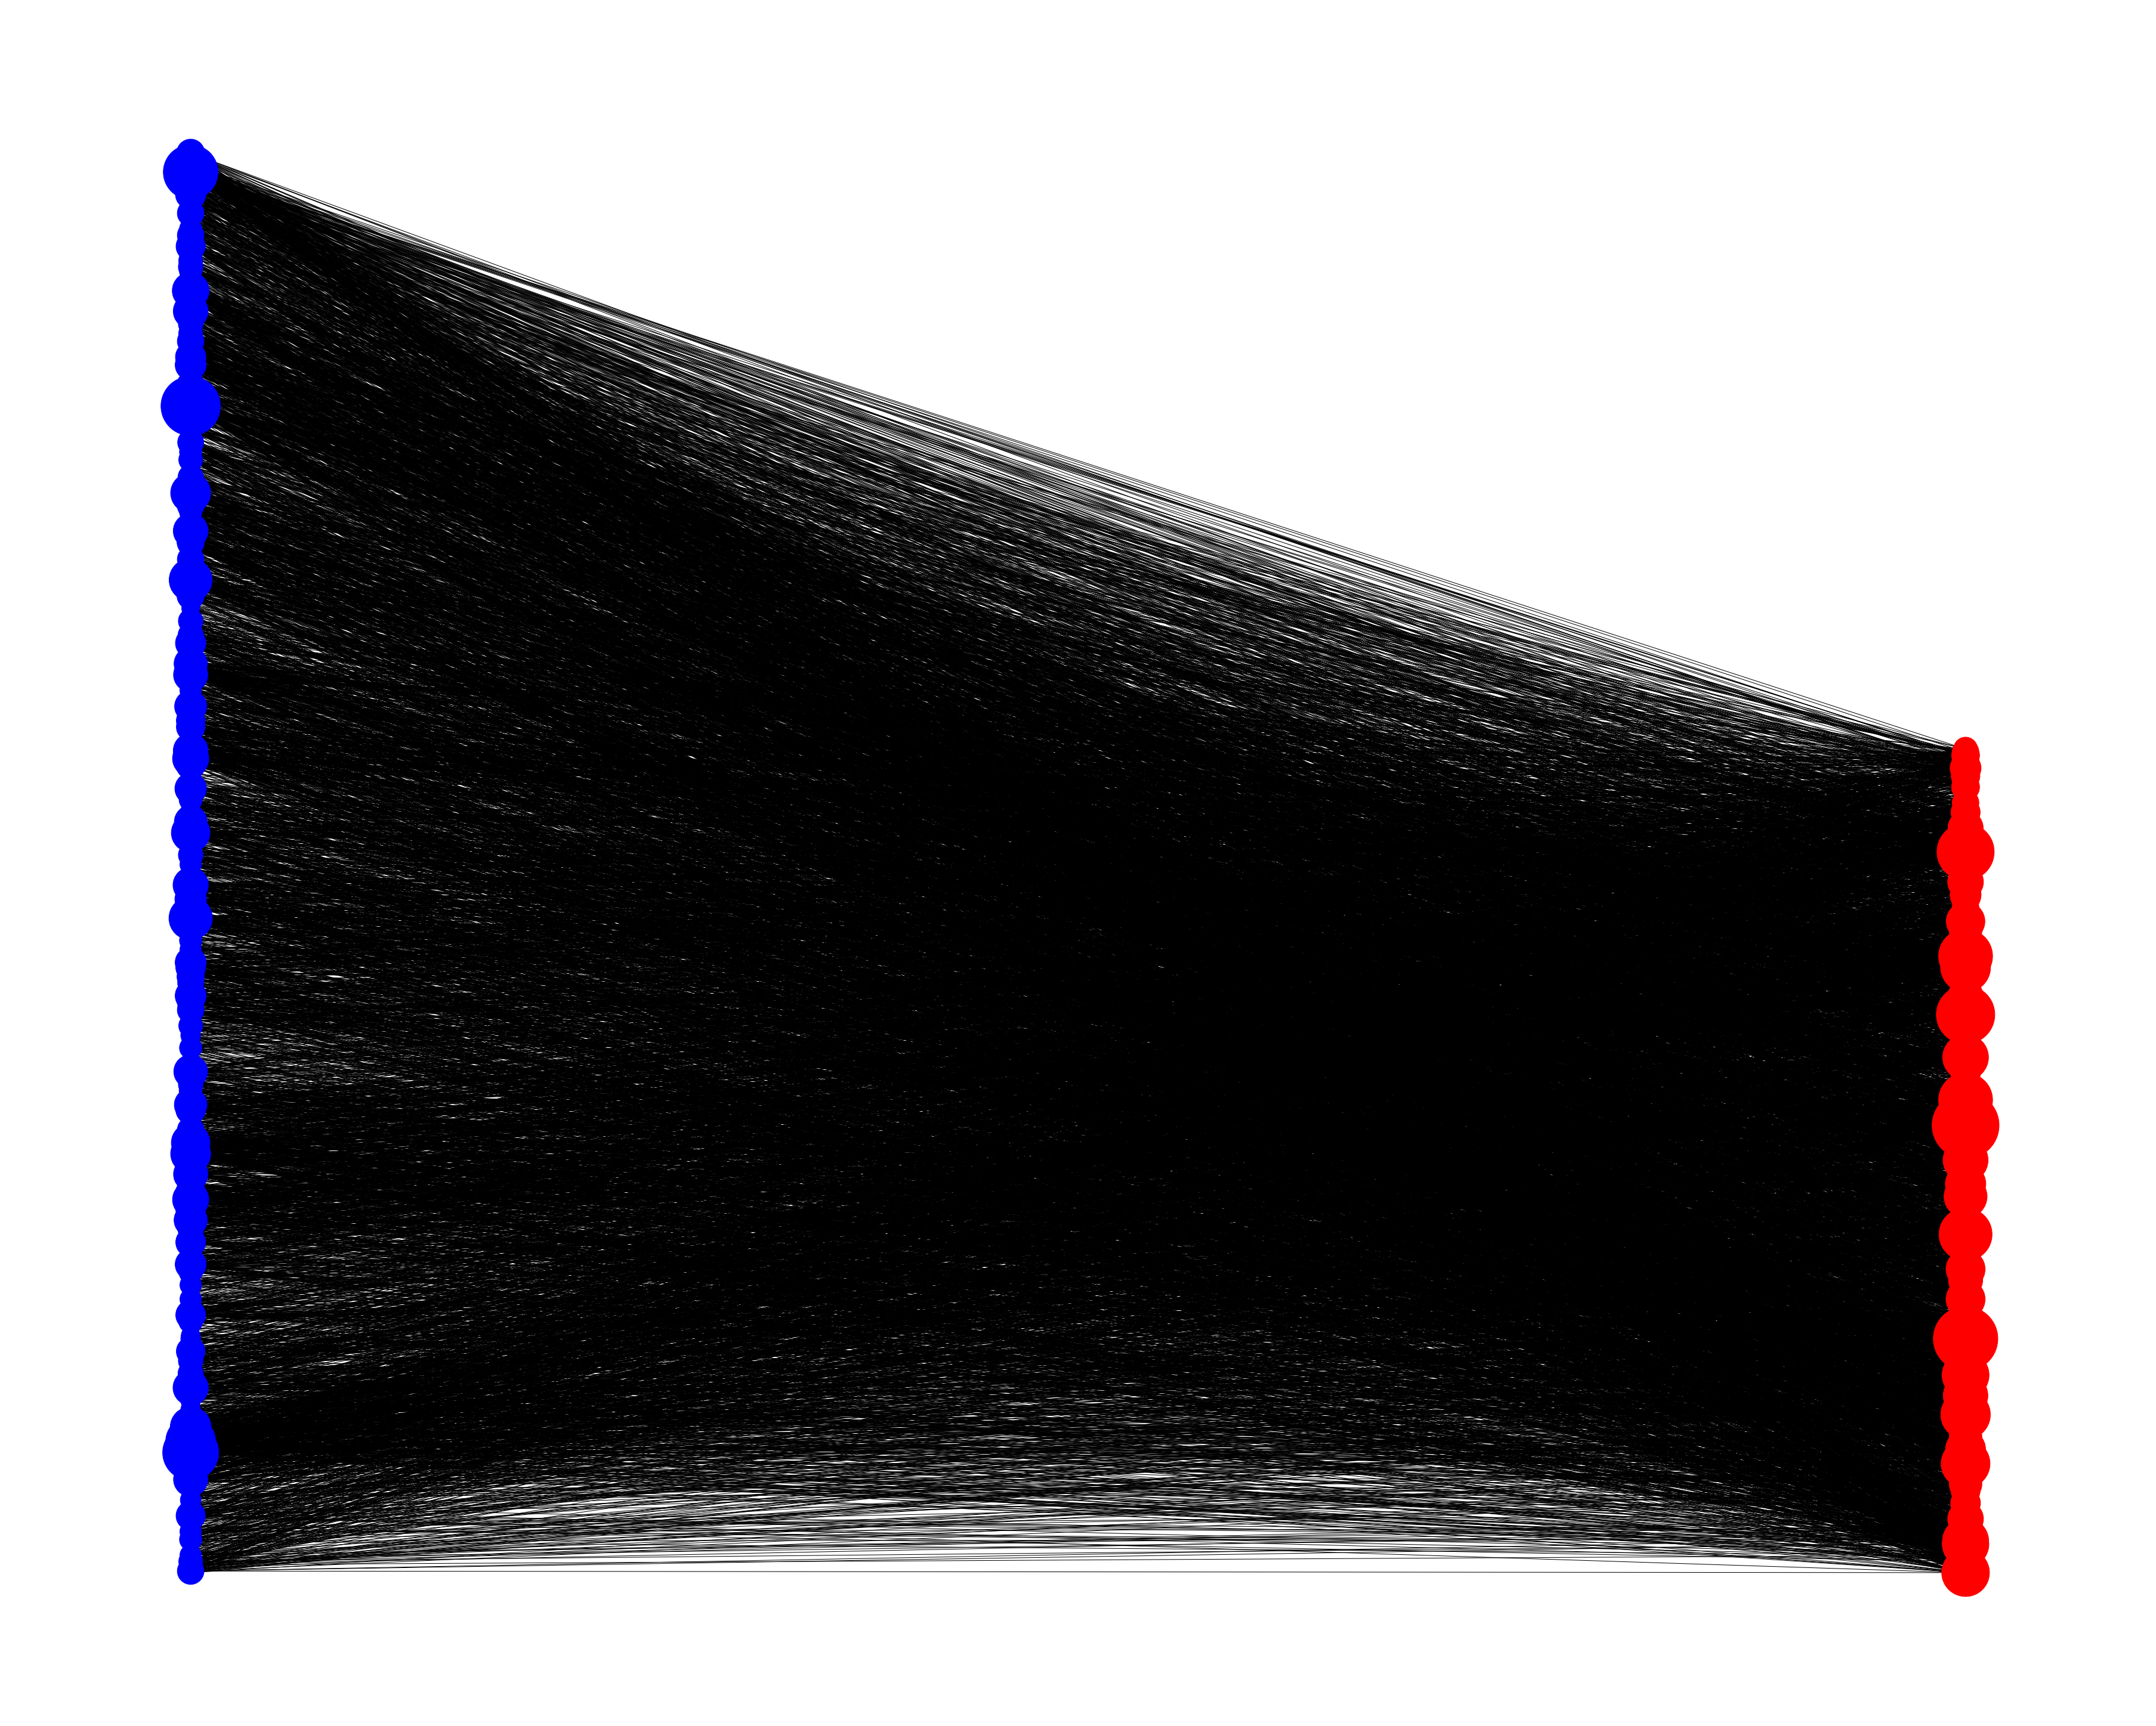

In [11]:
plt.figure(figsize=(50,40))
nx.draw(G, pos=pos,
        with_labels=False,
        node_color = color_list,
        node_size = [v * 100 for v in dict(G.degree()).values()])
plt.show()

# Analysis
In order to do a fair analysis, we need to seperate the nodes from either side while getting the weights based on the connections

In [12]:
N_graph = G.copy()

page_graph = bi.projected_graph(N_graph, page_nodes)
user_graph = bi.projected_graph(N_graph, user_nodes)

## Page Analysis
This analysis will show us the most frequented pages and how they are connected with eachother

Blue for Users | Red for Pages


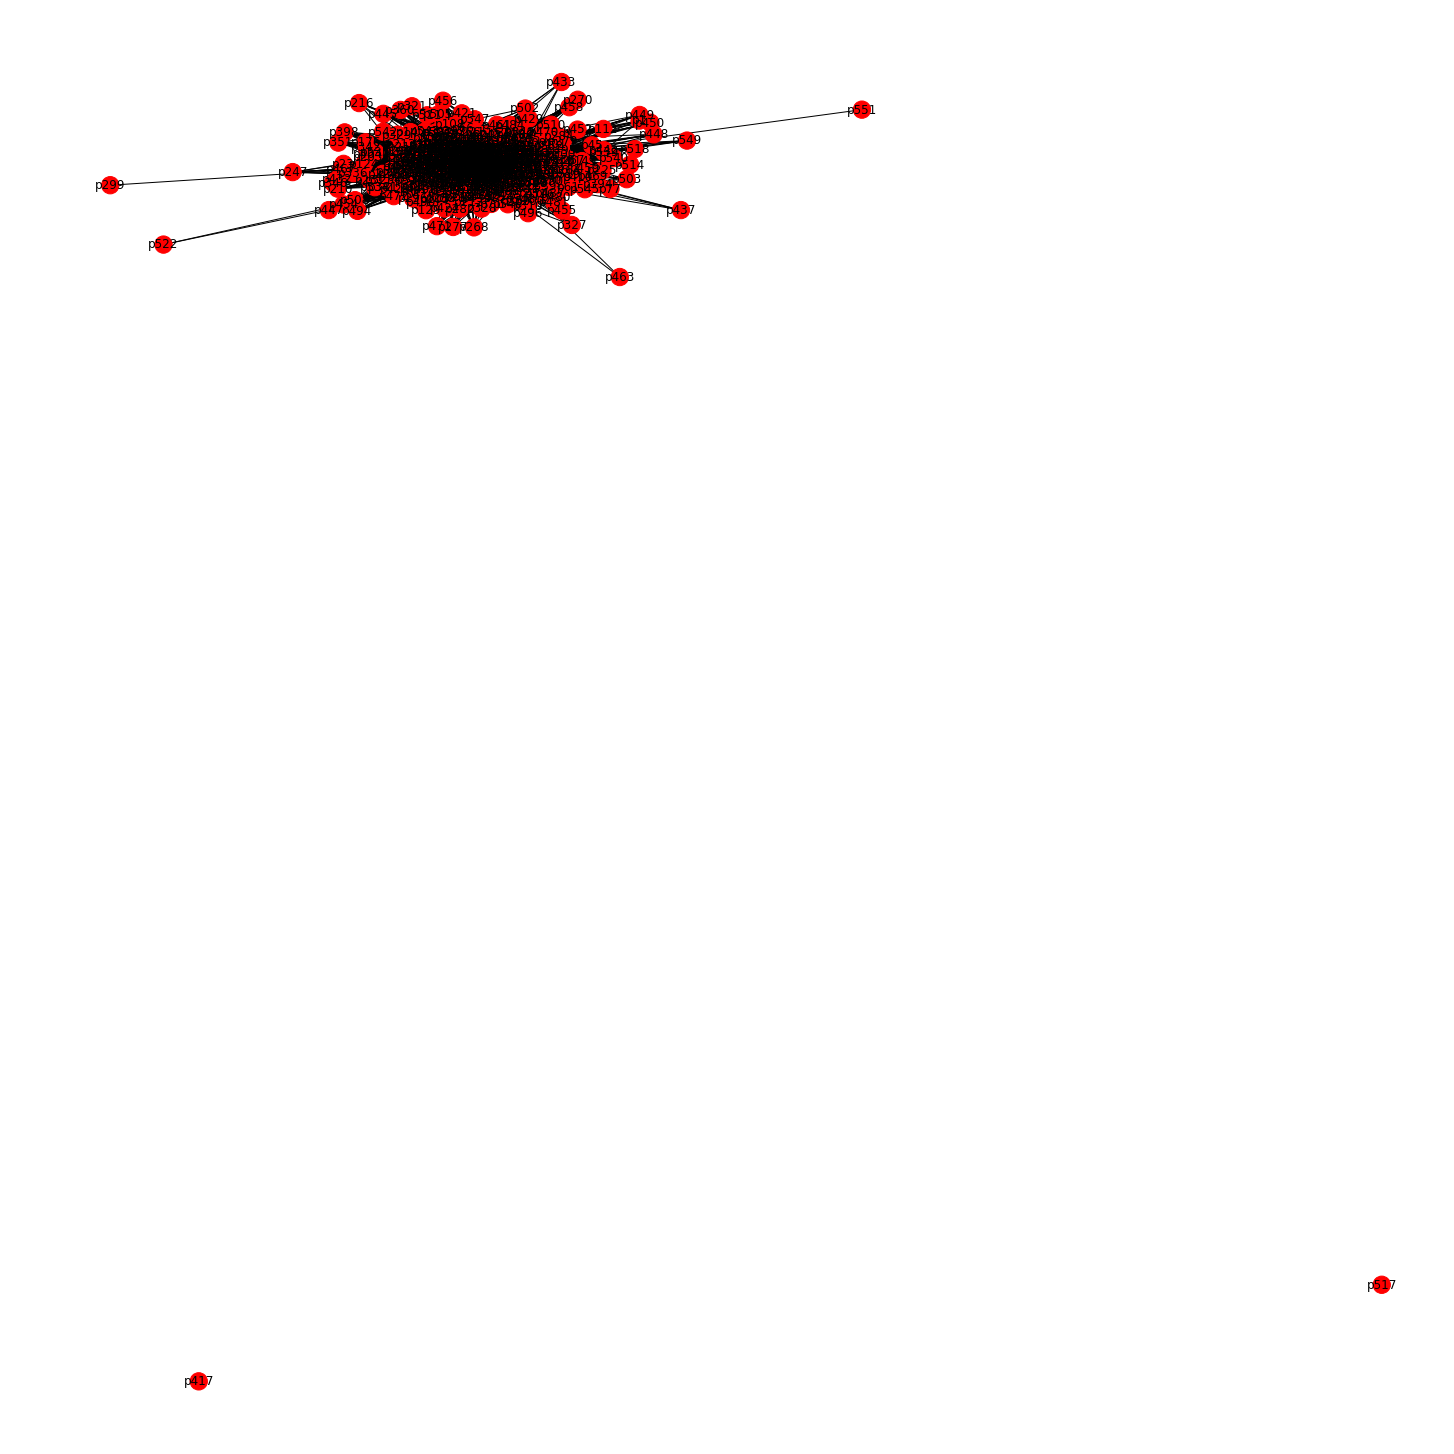

In [13]:
plt.figure(figsize=(20,20))
print("Blue for Users | Red for Pages")
colors = ["blue" if i in user_nodes  else "red" for i in page_graph.nodes]
pos = nx.spring_layout(page_graph, seed=648, scale=.5)  # Seed layout for reproducible node positions
nx.draw(page_graph, pos, with_labels=True, node_color=colors)
plt.show()

In [14]:
print("It has Nodes:",len(page_graph.nodes), " and Edges:",len(page_graph.edges))

It has Nodes: 522  and Edges: 36556


In [15]:
print("The Density is:", round(nx.density(page_graph),4))

The Density is: 0.2688


In [16]:
print("Are they all connected?",nx.is_connected(page_graph))

Are they all connected? False


In [17]:
bi.is_bipartite(page_graph)

False

Now let's get the Degree Centrality as well as some other measures.

In [22]:
sorted(page_graph.degree, key=lambda x: x[1], reverse=True)[0:10]

[('p13', 410),
 ('p12', 403),
 ('p82', 397),
 ('p237', 394),
 ('p208', 390),
 ('p10', 383),
 ('p131', 381),
 ('p20', 375),
 ('p91', 368),
 ('p291', 352)]

In [23]:
#closeness
closeness = nx.closeness_centrality(page_graph)
sorted(closeness.items(), key=lambda x: x[1], reverse = True)[:5]

[('p13', 0.8219517925964804),
 ('p12', 0.8141853189656475),
 ('p82', 0.8065642395369519),
 ('p237', 0.800321482264994),
 ('p208', 0.7966219992961265)]

In [24]:
#betweenness
betweenness = nx.betweenness_centrality(page_graph)
sorted(betweenness.items(), key=lambda x: x[1], reverse = True)[:5]

[('p13', 0.01961128696711093),
 ('p82', 0.01803608779925439),
 ('p12', 0.015767755748882242),
 ('p131', 0.013480881963955993),
 ('p10', 0.012671674587568247)]

In [25]:
#pagerank
pagerank = nx.pagerank(page_graph)
sorted(pagerank.items(), key=lambda x: x[1], reverse = True)[:5]

[('p13', 0.005426717328009637),
 ('p82', 0.005260402120492117),
 ('p12', 0.005235650459161902),
 ('p237', 0.0049799716669228795),
 ('p131', 0.0049472172280095724)]

It appears that page 13 is the most popular of pages in all measures. 

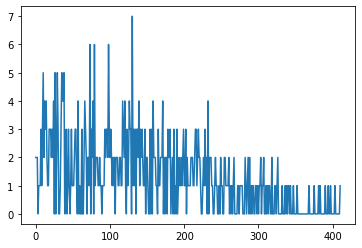

In [26]:
plt.plot(nx.degree_histogram(page_graph))

## User Analysis
This analysis will show us the most active users and how they are connected with eachother

Blue for Users | Red for Pages


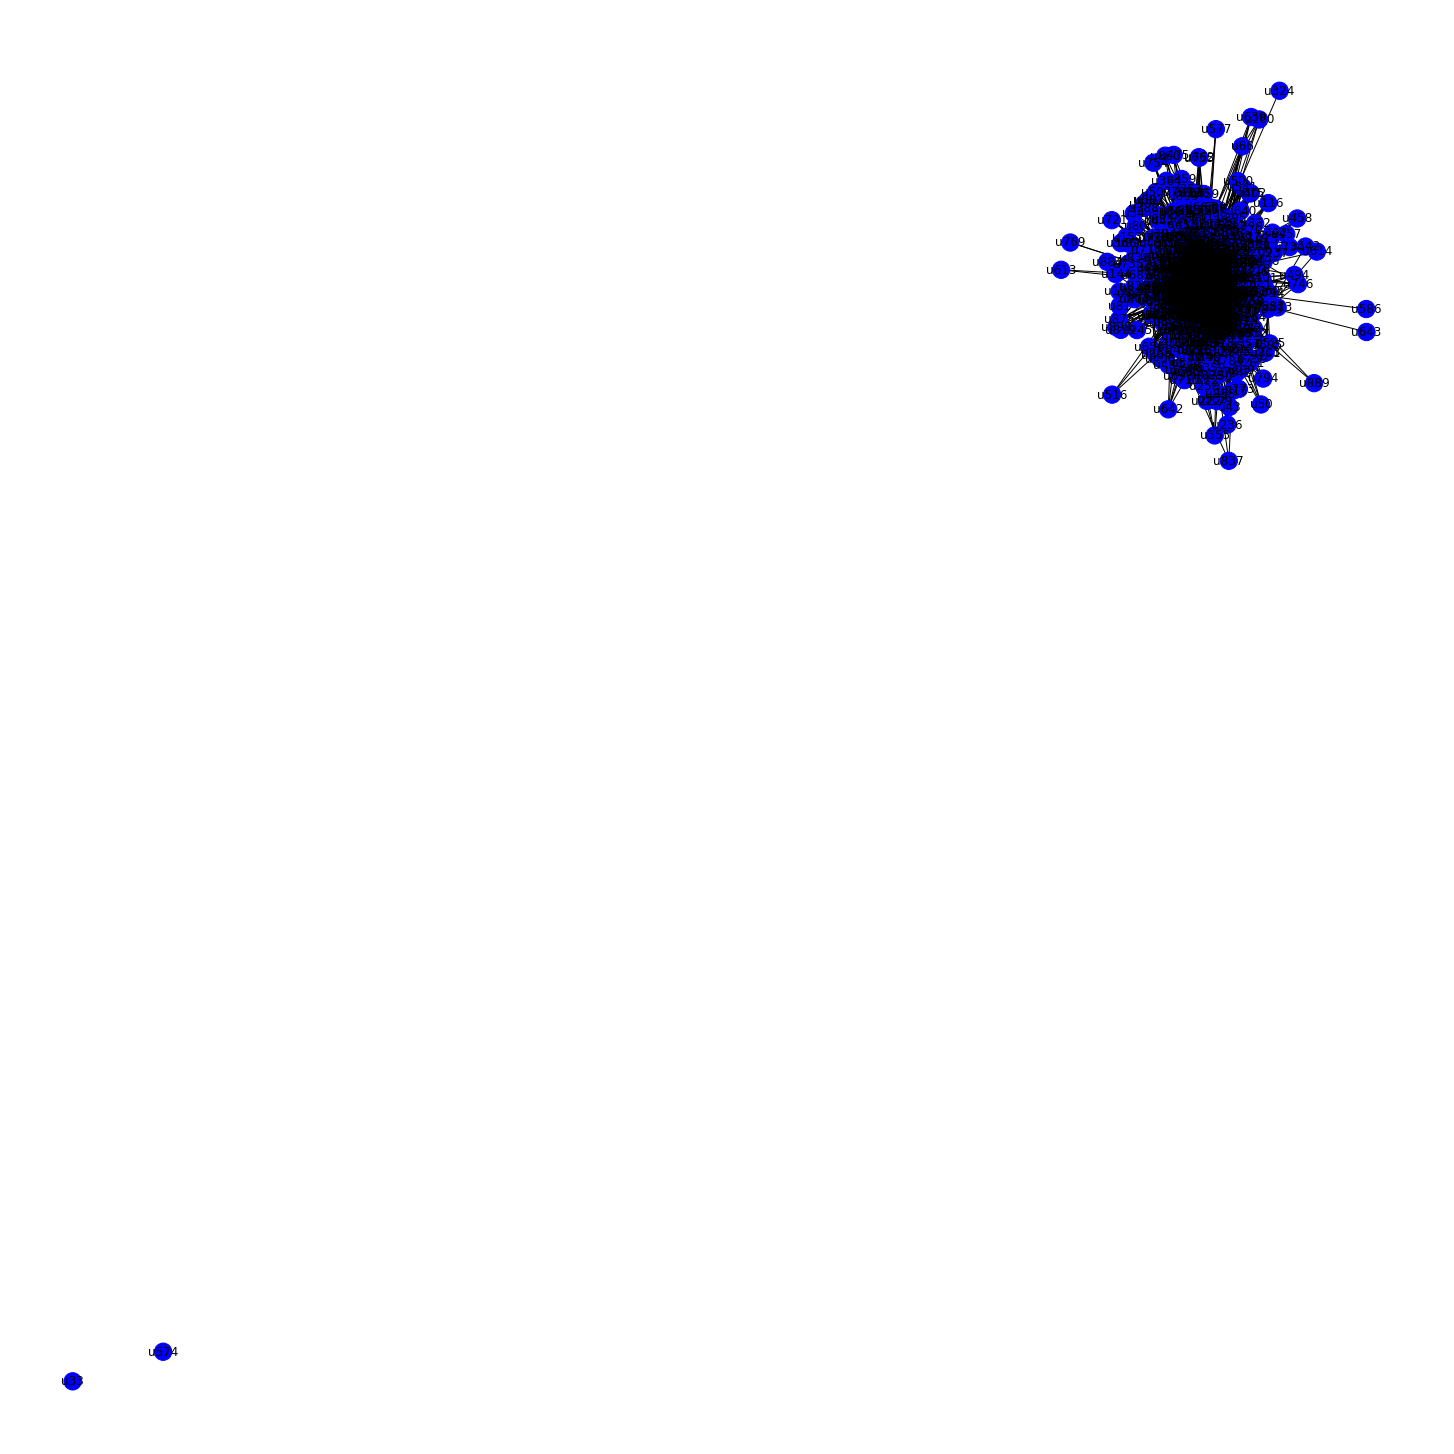

In [27]:
plt.figure(figsize=(20,20))
print("Blue for Users | Red for Pages")
colors = ["blue" if i in user_nodes  else "red" for i in user_graph.nodes]
pos = nx.spring_layout(user_graph, seed=648, scale=10)  # Seed layout for reproducible node positions
nx.draw(user_graph, pos, with_labels=True, node_color=colors)
plt.show()

In [28]:
print("It has Nodes:",len(user_graph.nodes), " and Edges:",len(user_graph.edges))

It has Nodes: 899  and Edges: 71380


In [29]:
print("The Density is:", round(nx.density(user_graph),4))

The Density is: 0.1768


In [30]:
print("Are they all connected?",nx.is_connected(user_graph))

Are they all connected? False


In [31]:
bi.is_bipartite(user_graph)

False

Now let's get the Degree Centrality as well as some other measures.

In [32]:
sorted(user_graph.degree, key=lambda x: x[1], reverse=True)[0:10]

[('u100', 633),
 ('u67', 604),
 ('u290', 599),
 ('u377', 565),
 ('u164', 563),
 ('u319', 546),
 ('u810', 538),
 ('u228', 515),
 ('u18', 506),
 ('u47', 497)]

In [33]:
#closeness
closeness = nx.closeness_centrality(user_graph)
sorted(closeness.items(), key=lambda x: x[1], reverse = True)[:5]

[('u100', 0.7713584593123248),
 ('u67', 0.7525290019722092),
 ('u290', 0.7493750665071118),
 ('u377', 0.7280166566310948),
 ('u164', 0.7274242915728107)]

In [34]:
#betweenness
betweenness = nx.betweenness_centrality(user_graph)
sorted(betweenness.items(), key=lambda x: x[1], reverse = True)[:5]

[('u290', 0.021598525696225508),
 ('u100', 0.021029810401321375),
 ('u67', 0.018889750987227446),
 ('u164', 0.015520239214278909),
 ('u810', 0.010457890853216972)]

In [35]:
#pagerank
pagerank = nx.pagerank(user_graph)
sorted(pagerank.items(), key=lambda x: x[1], reverse = True)[:5]

[('u100', 0.004228555888262852),
 ('u290', 0.00404965188486482),
 ('u67', 0.004027217559735189),
 ('u164', 0.003720870165694903),
 ('u377', 0.0035724716761561387)]

User 100 is the most active in the forums, but user 290 has the highest betweeness rating. 

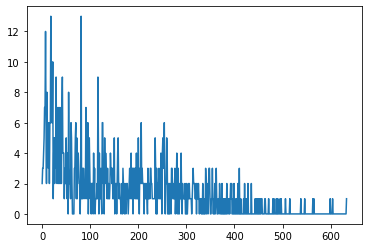

In [36]:
plt.plot(nx.degree_histogram(user_graph))

# 2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.

## Set Up the island method

In [19]:
def trim_edges(g, weight=1):
    g2=nx.Graph()  
    my_list=[]
    my_list1=[]
    for f, to, edata in g.edges(data=True): 
        if edata['weight'] > weight:
            my_list.append(f)
            my_list1.append(to)
            g2.add_edge(f,to,attr_dict={weight:edata['weight']})
    g2.add_nodes_from(my_list, bipartite=0)
    g2.add_nodes_from(my_list1, bipartite=1)
    return g2

In [20]:
def island_method(g, iterations=5, weight=1):
    weights = [edata['weight'] for f, to, edata in g.edges(data=True)]
    mn=int(min(weights)) if int(min(weights)) > weight else weight
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/(iterations-1))
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]


In [39]:
w_page_graph = bi.weighted_projected_graph(N_graph, page_nodes, ratio=False)

In [40]:
w_user_graph = bi.weighted_projected_graph(N_graph, user_nodes, ratio=False)

## Island Page Analysis
This analysis will show us the the pages with the highest frequency for a subset using the island method

In [71]:
# Running function for 5 iterations and a minimum weight of 2
islands_page = island_method(w_page_graph, 5,2)
for i in islands_page:
    threshold = i[0]
    graph_size = len(i[1])
    connected_comp = len(list(G.subgraph(c) for c in nx.connected_components(i[1])))
    print("Weight: " + str(threshold), "Nodes: " + str(graph_size), "Subgraphs: " + str(connected_comp)
          )

Weight: 2 Nodes: 382 Subgraphs: 2
Weight: 10 Nodes: 66 Subgraphs: 3
Weight: 18 Nodes: 19 Subgraphs: 1
Weight: 26 Nodes: 9 Subgraphs: 3
Weight: 34 Nodes: 2 Subgraphs: 1


We can see here that for a weight of 10, there are 66 nodes and 3 subgraphs, we will take a look at the first one

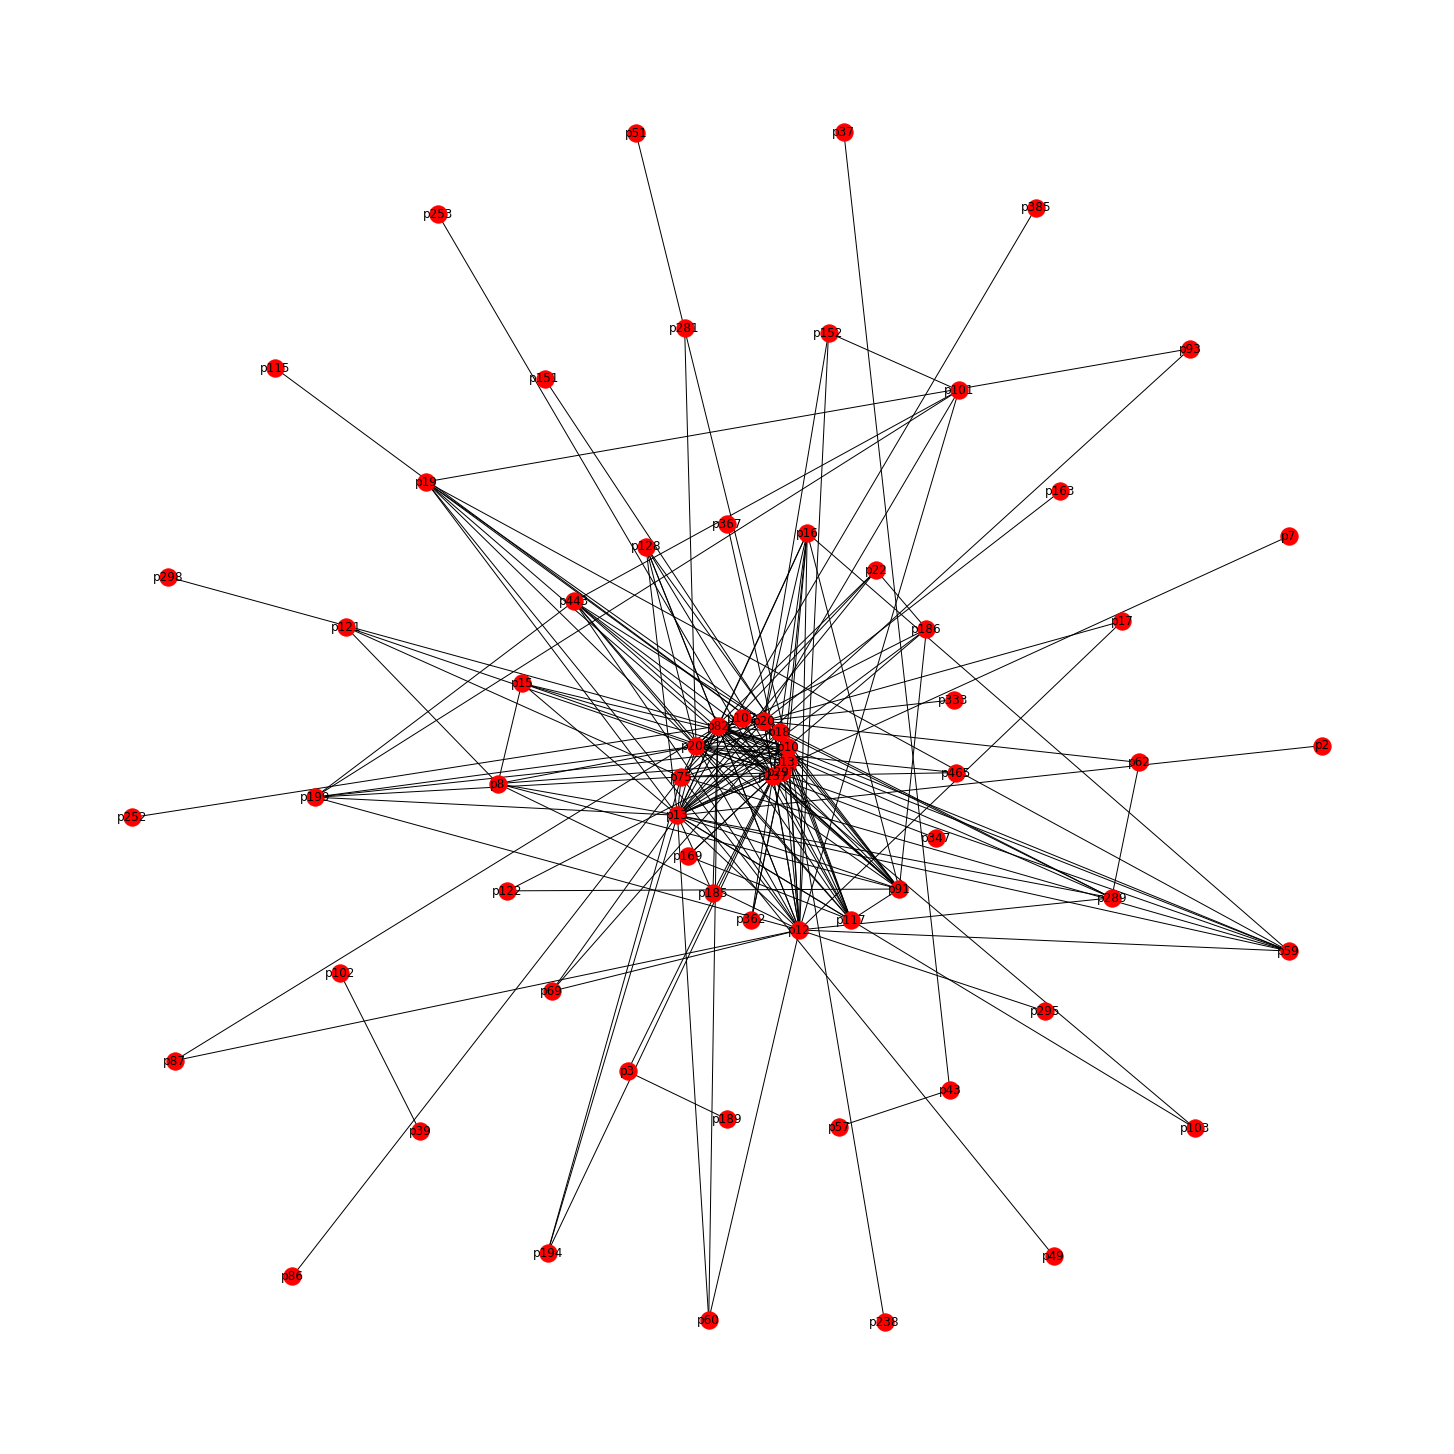

In [101]:
G1=islands_page[1][1]
plt.figure(figsize=(20,20))
colors = "Red"
pos = nx.spiral_layout(G1, scale=10)  # Seed layout for reproducible node positions
nx.draw(G1, pos, with_labels=True, node_color=colors)
plt.show()

In [102]:
sorted(G1.degree, key=lambda x: x[1], reverse=True)[0:10]

[('p13', 31),
 ('p10', 27),
 ('p82', 23),
 ('p208', 23),
 ('p12', 23),
 ('p20', 19),
 ('p237', 18),
 ('p18', 16),
 ('p91', 16),
 ('p291', 14)]

In [103]:
#closeness
closeness = nx.closeness_centrality(G1)
sorted(closeness.items(), key=lambda x: x[1], reverse = True)[:5]

[('p13', 0.6153846153846154),
 ('p10', 0.5955334987593053),
 ('p208', 0.565149136577708),
 ('p82', 0.5594405594405595),
 ('p12', 0.5483625285605483)]

In [104]:
#betweenness
betweenness = nx.betweenness_centrality(G1)
sorted(betweenness.items(), key=lambda x: x[1], reverse = True)[:5]

[('p10', 0.2380282639212222),
 ('p13', 0.19743613769808618),
 ('p82', 0.10737524373094227),
 ('p12', 0.10203475791428285),
 ('p208', 0.09085479569607116)]

In [105]:
#pagerank
pagerank = nx.pagerank(G1)
sorted(pagerank.items(), key=lambda x: x[1], reverse = True)[:5]

[('p13', 0.0681683773636487),
 ('p10', 0.06523310245756272),
 ('p82', 0.05019318693132985),
 ('p12', 0.048922229763480984),
 ('p208', 0.047958431639051155)]

## User Layout
This analysis will show us the the most active users for a subset using the island method

In [106]:
# Running function for 5 iterations and a minimum weight of 2
islands_user = island_method(w_user_graph, 5,2)
for i in islands_user:
    threshold = i[0]
    graph_size = len(i[1])
    connected_comp = len(list(G.subgraph(c) for c in nx.connected_components(i[1])))
    print("Weight: " + str(threshold), "Nodes: " + str(graph_size), "Subgraphs: " + str(connected_comp)
          )

Weight: 2 Nodes: 492 Subgraphs: 1
Weight: 9 Nodes: 70 Subgraphs: 3
Weight: 16 Nodes: 15 Subgraphs: 2
Weight: 23 Nodes: 6 Subgraphs: 2
Weight: 30 Nodes: 2 Subgraphs: 1


Looks like at a weight of 9 we have 3 islands and 70 nodes, we will take a closer look at the one

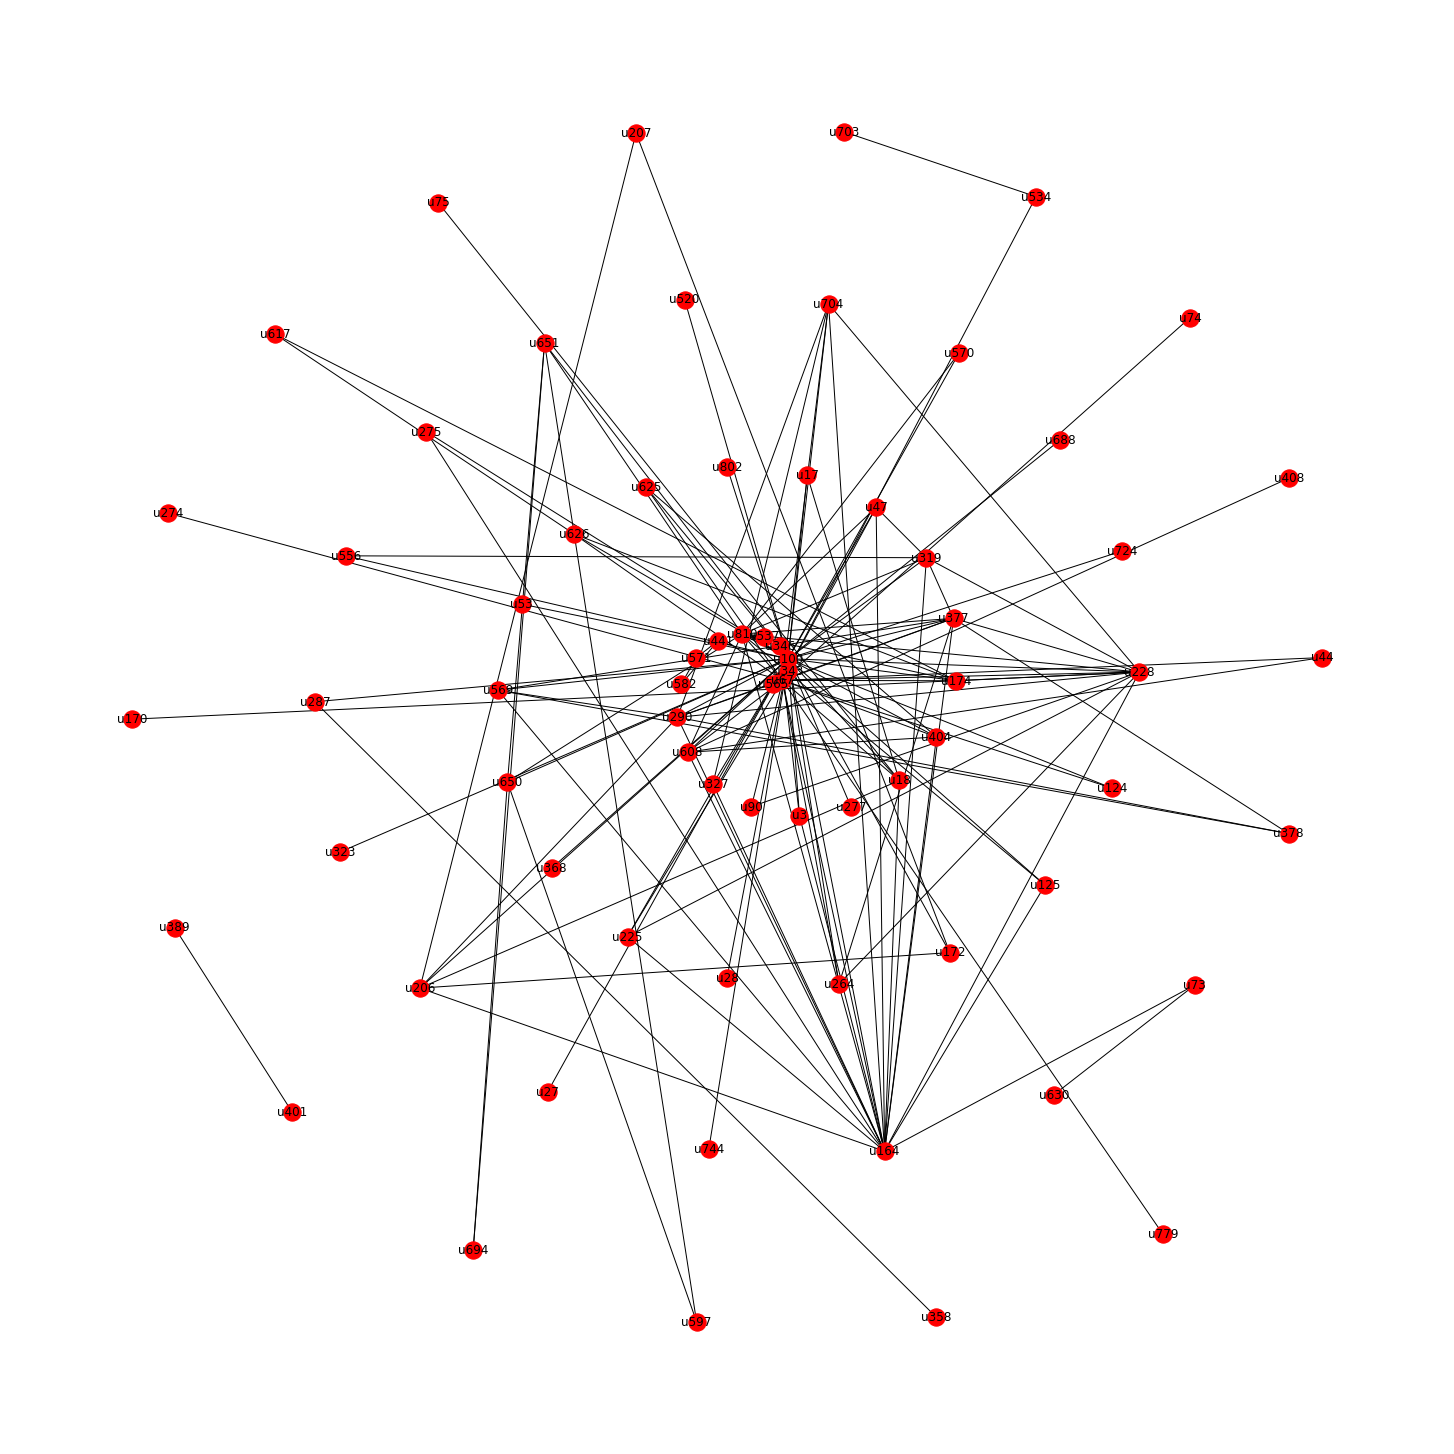

In [108]:
G1=islands_user[1][1]
plt.figure(figsize=(20,20))
colors = "Red"
pos = nx.spiral_layout(G1, scale=10)  # Seed layout for reproducible node positions
nx.draw(G1, pos, with_labels=True, node_color=colors)
plt.show()

In [109]:
sorted(G1.degree, key=lambda x: x[1], reverse=True)[0:10]

[('u100', 45),
 ('u67', 23),
 ('u164', 20),
 ('u810', 14),
 ('u228', 13),
 ('u377', 10),
 ('u290', 9),
 ('u608', 7),
 ('u319', 7),
 ('u18', 6)]

In [110]:
#closeness
closeness = nx.closeness_centrality(G1)
sorted(closeness.items(), key=lambda x: x[1], reverse = True)[:5]

[('u100', 0.6983802216538789),
 ('u67', 0.53965744400527),
 ('u164', 0.5253302552263691),
 ('u810', 0.4988430154670564),
 ('u228', 0.48262047837869687)]

In [111]:
#betweenness
betweenness = nx.betweenness_centrality(G1)
sorted(betweenness.items(), key=lambda x: x[1], reverse = True)[:5]

[('u100', 0.5641123487670799),
 ('u67', 0.19804131054131052),
 ('u164', 0.09401294334158786),
 ('u810', 0.056659231883017046),
 ('u228', 0.03648690988844442)]

In [112]:
#pagerank
pagerank = nx.pagerank(G1)
sorted(pagerank.items(), key=lambda x: x[1], reverse = True)[:5]

[('u100', 0.14238614459812696),
 ('u67', 0.06964363879033793),
 ('u164', 0.05557136073105907),
 ('u810', 0.03997566527404221),
 ('u228', 0.036269002197478875)]